# Graph Augmentation for GNNs

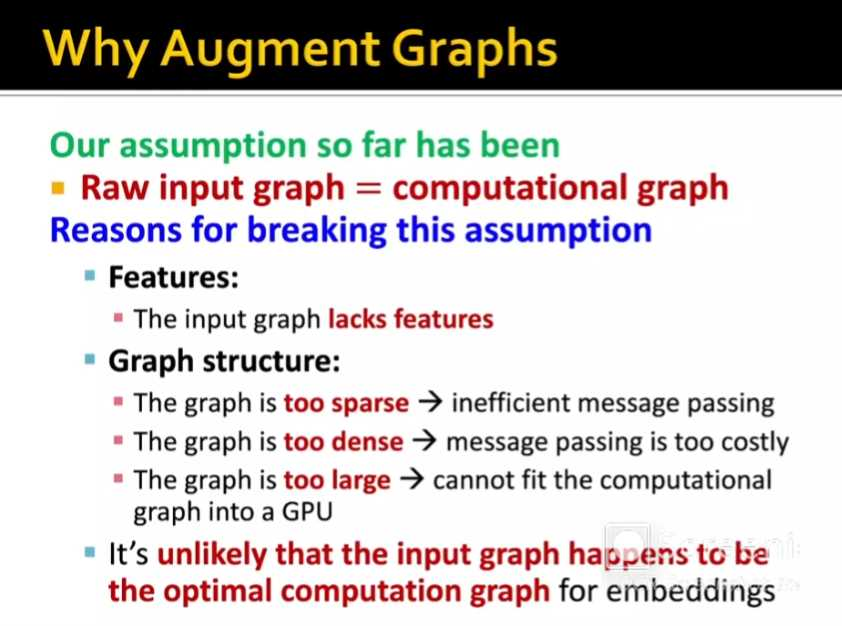

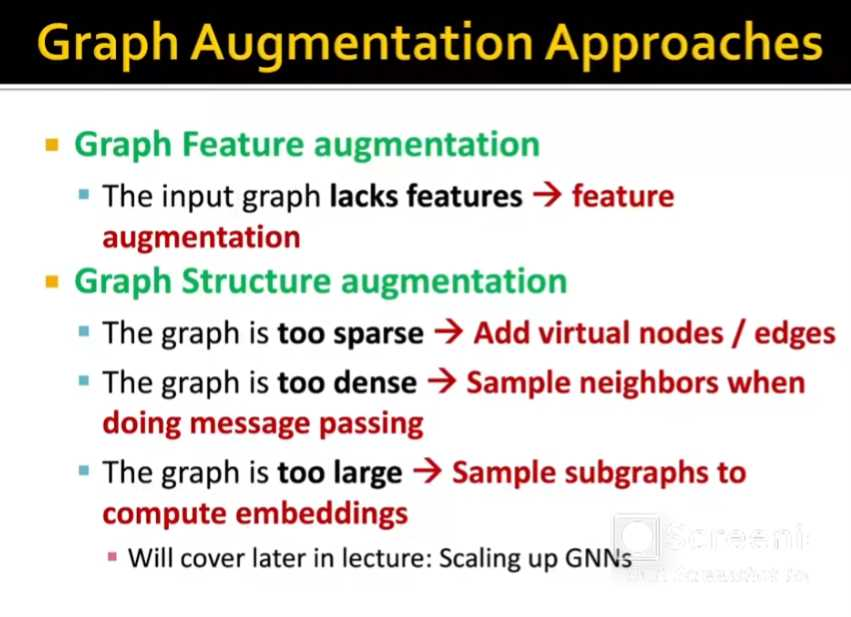

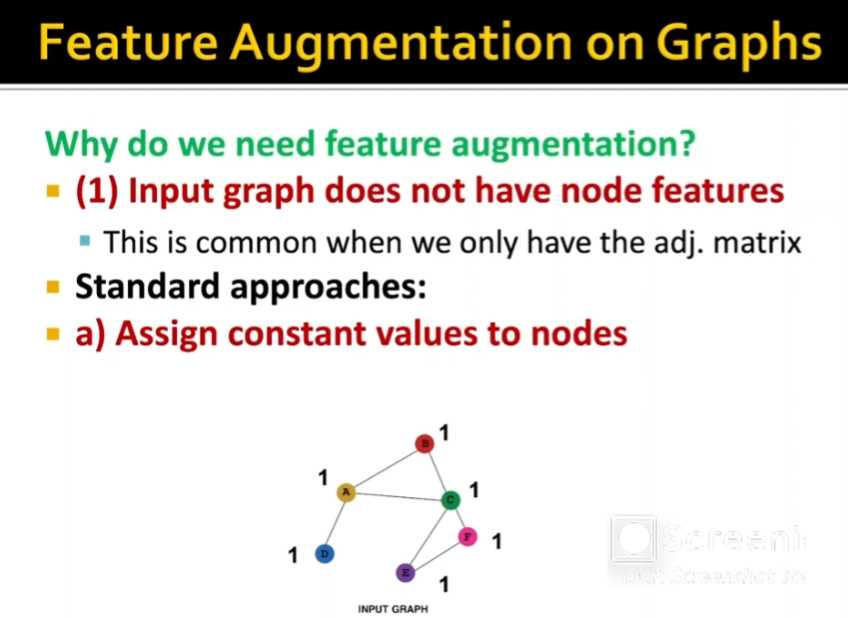

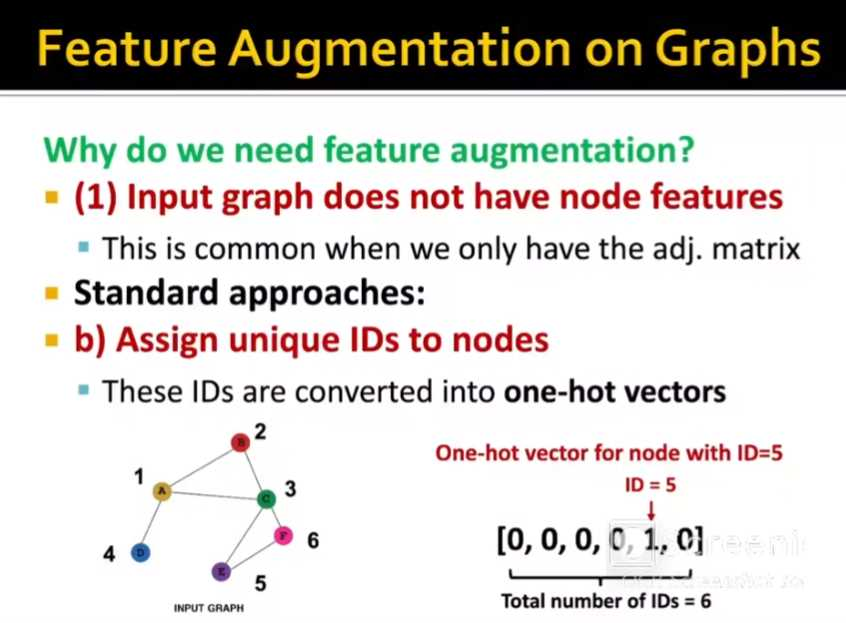

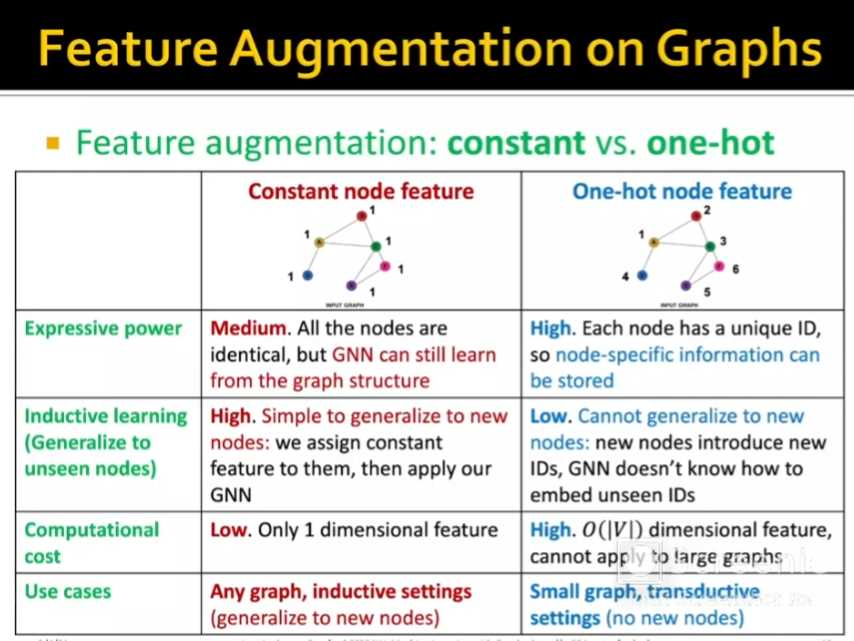

### - 원-핫 코딩(One-hot encoding)으로 새 ID를 임베딩 하지 못하는 이유

- GNN은 weight matrix W를 원-핫 벡턱에 맞게 학습했음

  - 예를 들어, 노드3이면 **"어떤 임베딩을 써야하는지"**를 고정시켜 학습

- 그런데 **새로운 노드 ID**는 기존 원-핫 벡터에 없음 -> 새로운 차원이 생겨야 하는데 weight가 학습되지 않음.


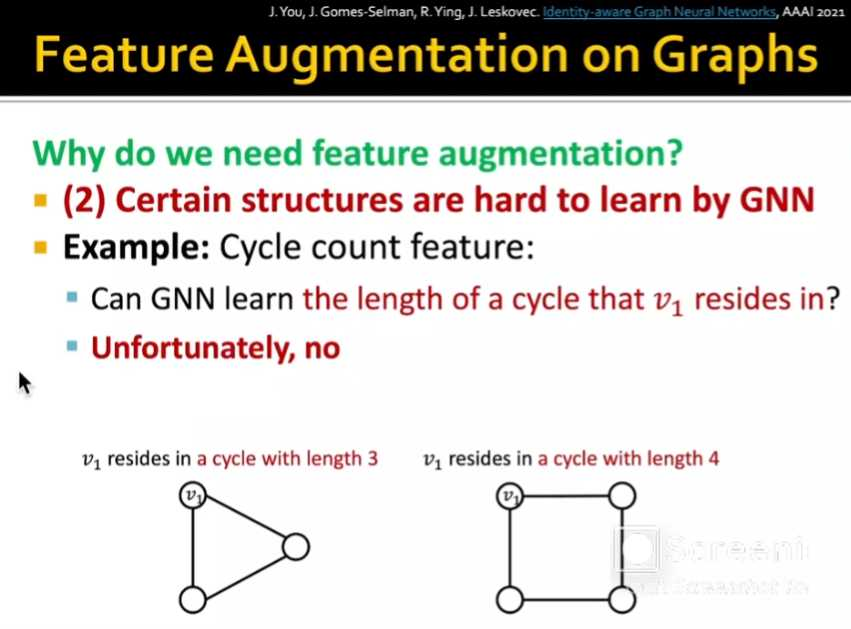

- 싸이클을 학습하기가 어렵다.
- 아래 설명을 확인할 것

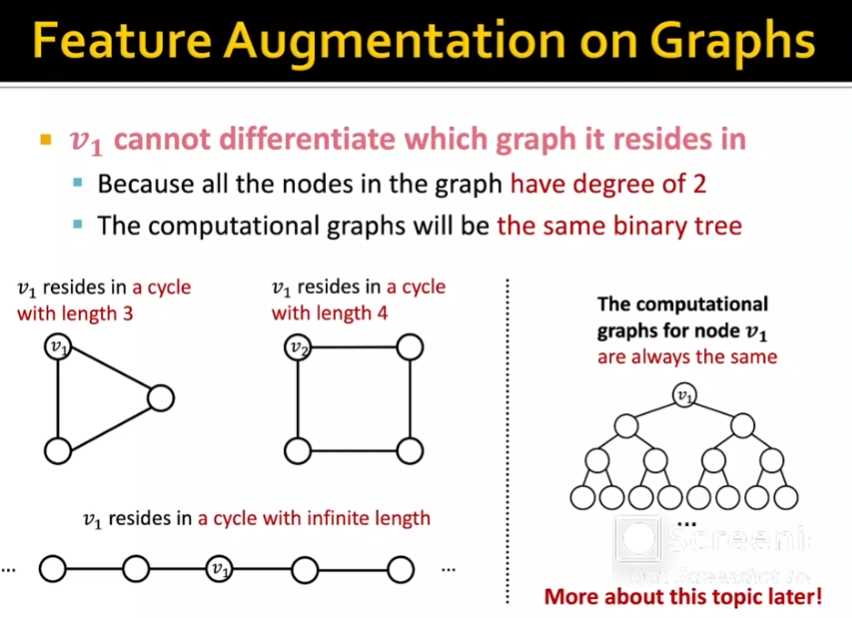

- v1과 v2를 보면 둘 다 이웃을 두명 가지고 있다.
- 즉, 차수가 2이다.
- 그래서 computational graph로 만들면 v1, v2가 오른쪽 그림처럼 똑같은 형태로 나온다.


### - 부연 설명

- GNN은 message passing 기반이다.
- 즉, 노드가 이웃들로부터 정보를 모은다.

- 각 레이어에서 1-hop 이웃까지 정보만 aggregation된다. -> 여러 레이어가 쌓여야 멀리까지 본다는 뜻이다.

- 하지만 cycle이 있는지 없는지는 **"경로를 따라가서 돌아왔는지"**를 확인해야 하는데
- GNN은 그냥 **"내 주변에 누가 있는지 평균"**만 보고 있다.
- 그래서 노드 간에 **"어떤 구별"**이 이루어지지 않는 한 GNN은 노드를 구별할 수 없다.

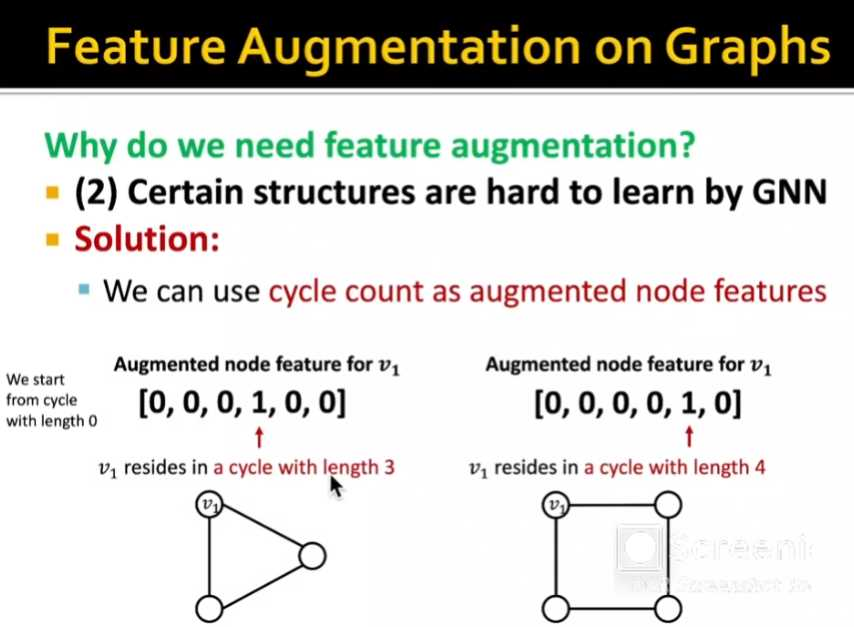

- 그래서 해결책은 각 노드에 대한 특징 벡터를 만드는 것이다.

- 싸이클 카운트 정보로 노드 기닝을 보강한다.

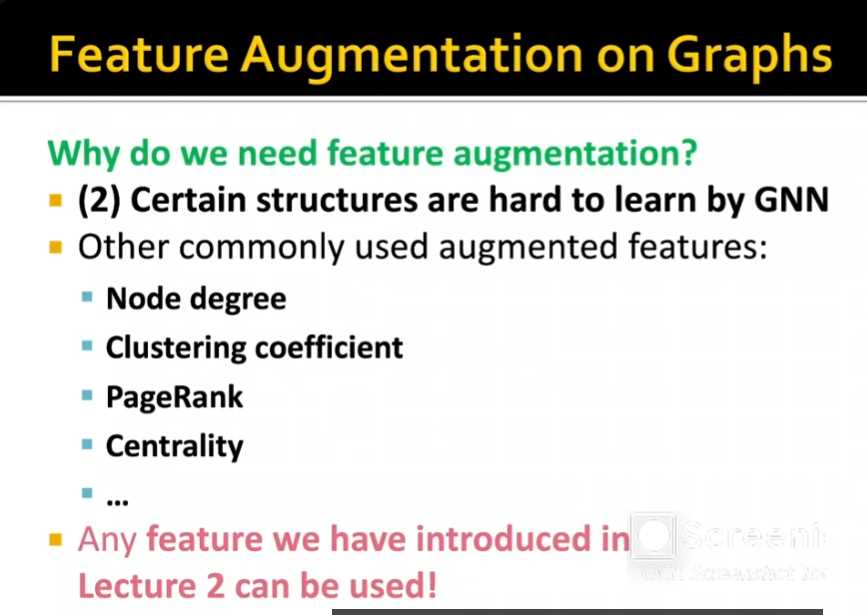

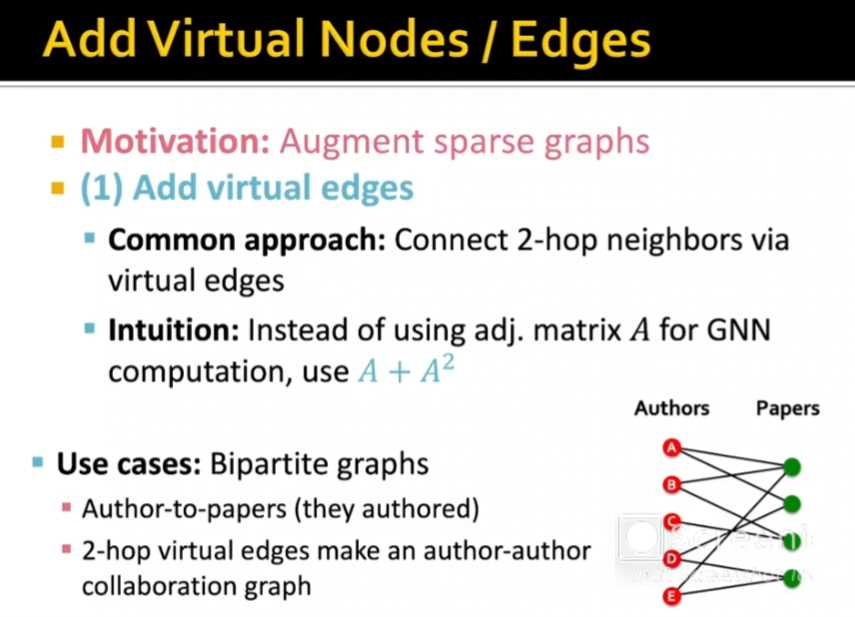

- virtual edge를 통해 두 개의 홉 이웃을 연결하는 것이다.

- adj. matrix A를 대신해 A + A^2을 사용하는 것이다.

### 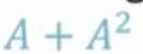을 쓰는 이유

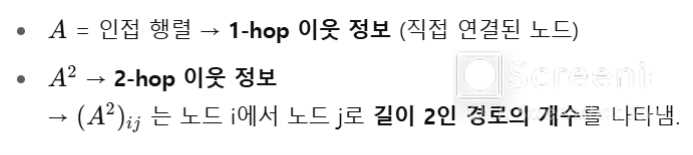

- 실제로 연결된 것은 아니지만,
- 더 멀리 있는 노드와 연결된 효과를 볼 수 있기 때문에, 구조적인 부분을 더 잘 볼 수 있다.

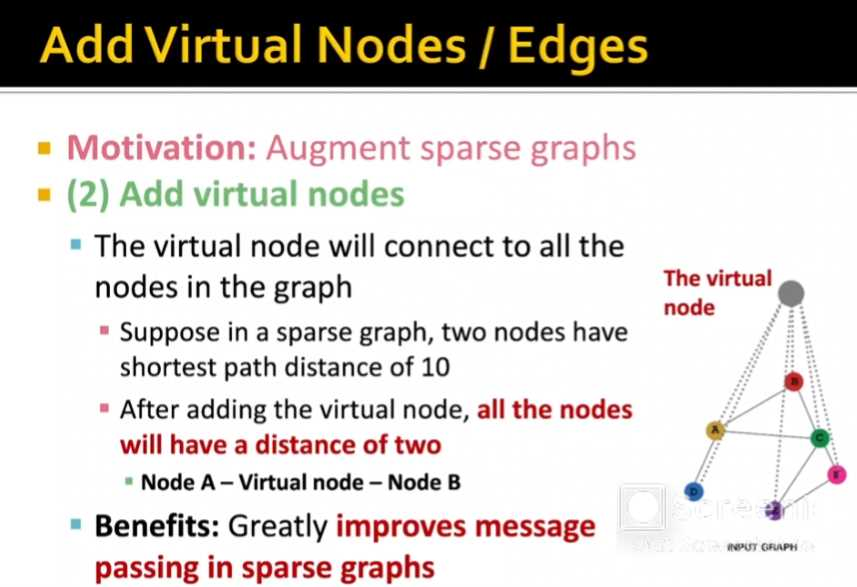

- 그래프가 너무 sparse(공간이 남을 때) 사용한다.

- 결국에는 모든 노드 간에 거리가 짧아진다.
- 그러면 메시지 전달이 더 빨라진다.

  - 예를 들어,
  - 그래프 A → B → C → D
  - A에서 D까지 여러 hop을 거쳐야 한다.
  - 즉, 정보가 느리게 전파되고 희석될 수 있다.

- 일종에 허브 노드처럼 작동한다.
- 모든 노드에서 가상 노드로 직접 연결되고 -> 가상 노드에서 다시 다른 노드로도 바로 연결이 가능하다.
  - 예를 들어,
  - A -> virtual node -> D


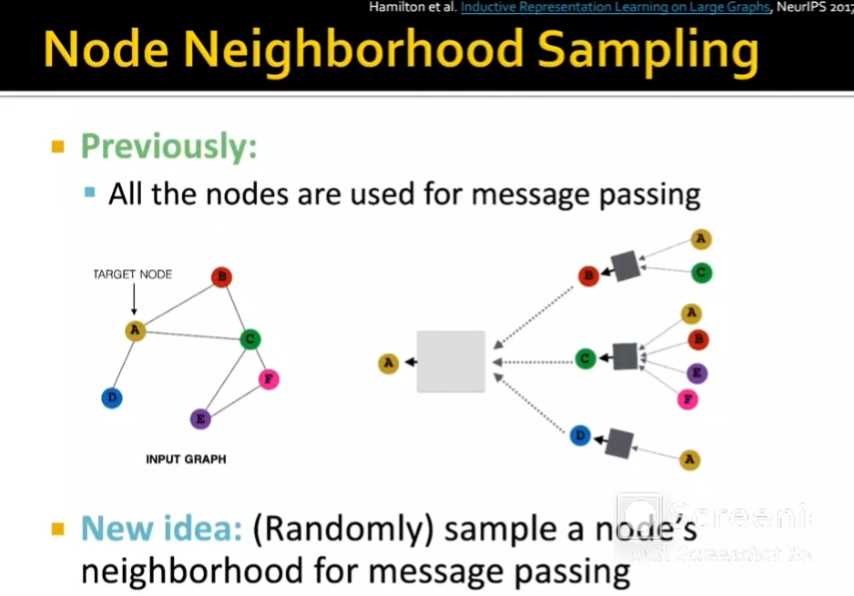

- 그래프가 너무 클 때를 얘기한다.
- 너무 많은 사람들과 연결하면 계산 비용이 많이 든다.


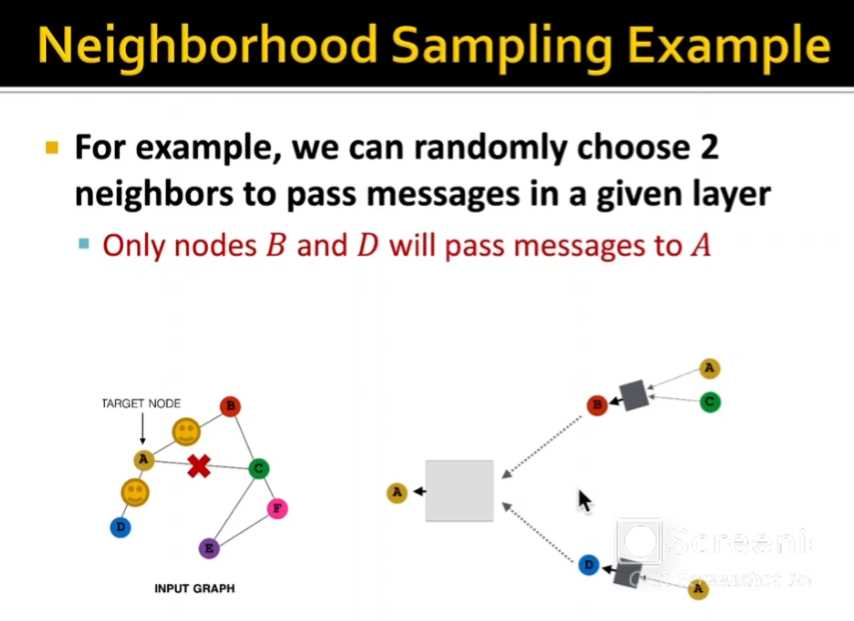

- 그래서 주어진 계층에서 메시지를 전달하는 두 이웃을 무작위로 선택하면 어떨 까 라는 생각이다.

- 즉, 두 개만 선택하고, 하나는 무시한다는 것이다.

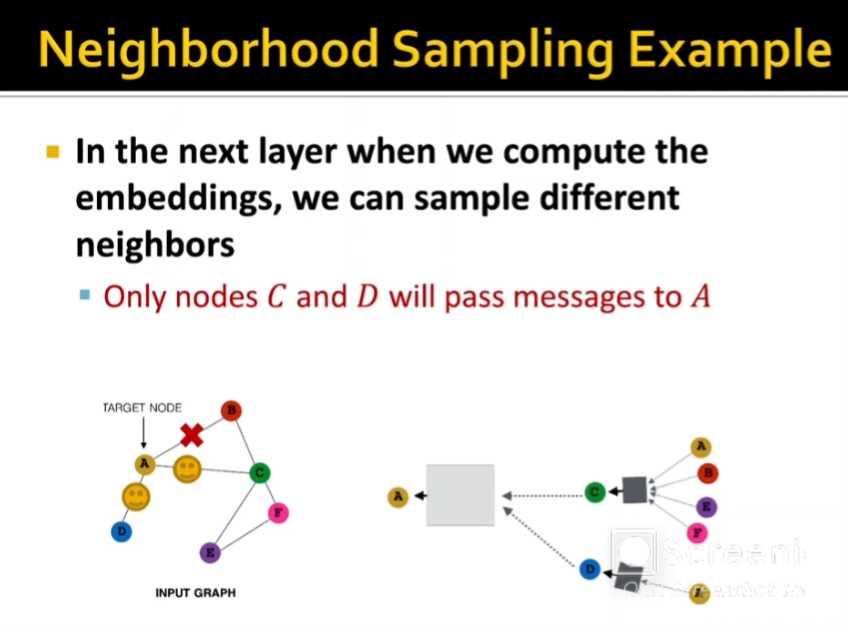

- 매 레이어마다 다르게 샘플링 할 수 있도록 만든다.

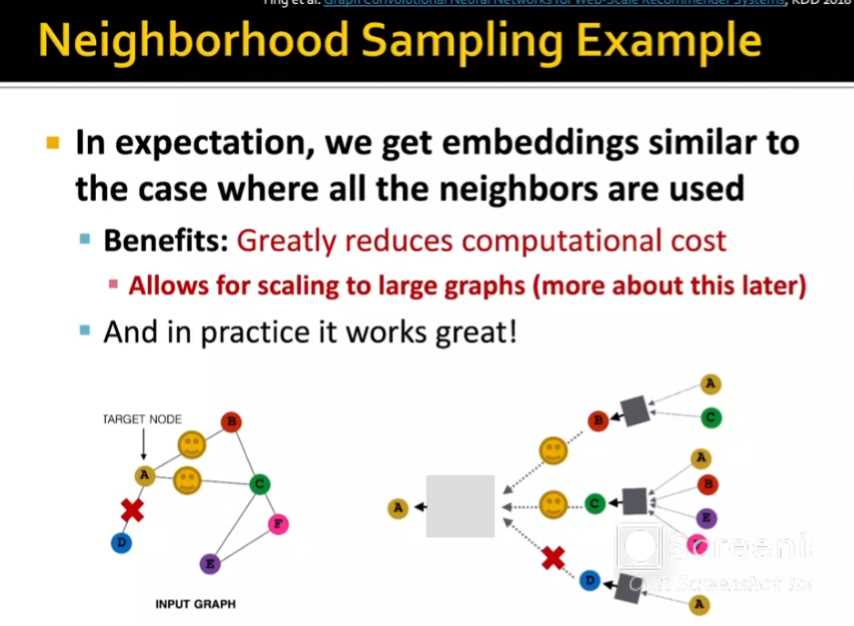

- 다양한 무작위 샘플링을 거친 후, 모든 노드를 사용했을 때와 비슷한 임베딩을 얻게 될 것이기 때문이다.